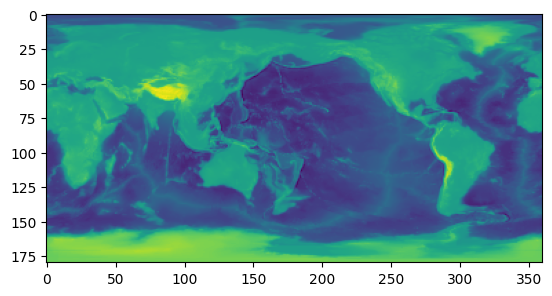

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('topography_180x360_grid.txt')
plt.imshow(data)
plt.show()

# Part 2 - Population Displacement

In [6]:
curr_data = np.loadtxt('population - data.csv', dtype=str, delimiter=',')
for i in range(len(curr_data)):
    curr_data[i][0] = np.round(float(curr_data[i][0])) + 90
    curr_data[i][1] = np.round(float(curr_data[i][0])) + 180

display(curr_data)

R = 6371000 # radius of earth in meters
area = 0.0
volume = 0.0

longitude = data.shape[1] # longitude 
latitude = data.shape[0] # latitude 

dx = 2 * np.pi * R / longitude
dy = np.pi * R / latitude

array([['126.0', '306.0', '35676000'],
       ['131.0', '311.0', '19354922'],
       ['109.0', '289.0', '19028000'],
       ...,
       ['160.0', '340.0', '0'],
       ['164.0', '344.0', '0'],
       ['151.0', '331.0', '0']], dtype='<U9')

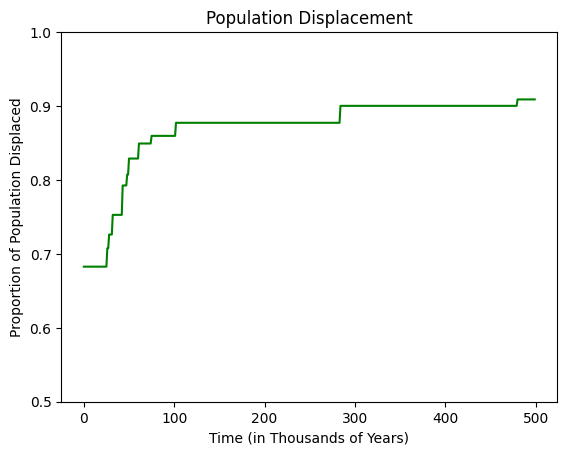

In [7]:
iterations = 500
population_percent = np.copy(data)
from matplotlib.animation import FFMpegWriter
metadata = dict(title='Water percent', artist='me',comment='LAVA')
writer = FFMpegWriter(fps=30, metadata=metadata)
fig = plt.figure()
for i in range(longitude):
    for j in range(latitude):
        if population_percent[j, i] < 0:
            population_percent[j, i] = -5000

pop = np.zeros(iterations)
total_population = 0
for i in range(len(curr_data)):
    total_population += int(curr_data[i][2])

with writer.saving(fig, "animation3.mp4", dpi=200):

    population_array = np.zeros(iterations)
    x = np.linspace(0, iterations - 1, iterations)
    for iteration in range(iterations):
        for i in range(longitude):
            for j in range(latitude):
                if population_percent[j, i] < 0.037 * iteration * 50:
                    population_percent[j, i] -= 0.037 * iteration * 50
                    if population_percent[j, i] < 0:
                        population_percent[j, i] = -5000
        
        pop_displaced = 0
        for i in range(len(curr_data)):
            lat = int(float(curr_data[i][0]))
            long = int(float(curr_data[i][1]))
            if population_percent[lat, long] < 0:
                pop_displaced += int(curr_data[i][2])
        pop[iteration] = pop_displaced / total_population
        plt.clf()
        plt.ylim(0.5, 1)
        plt.plot(x, pop, 'g')
        plt.xlabel('Time (in Thousands of Years)')
        plt.ylabel('Proportion of Population Displaced')
        plt.title('Population Displacement')

        writer.grab_frame()
        